In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
data_path = 'asl' 

num_classes = 26 # "A" to "Z" 
img_size = 50 
num_channels = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (img_size * img_size) // 2

labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(labels))

26


In [5]:
y_unique = []
x_unique = []
for alphabet in os.listdir(data_path):
    if alphabet!=('.DS_Store'):
        if alphabet in labels:
            for image in os.listdir(data_path+str('/')+alphabet):
                X=imread(data_path+str('/')+alphabet+str('/')+image)
                x_unique.append(X)
                y_unique.append(alphabet)
                break

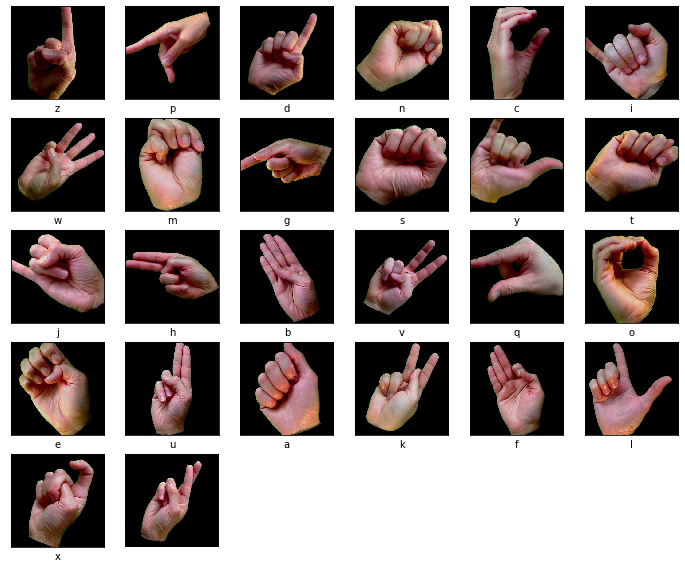

In [6]:
#visualizing dataset
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()

In [7]:
def create_data(data_path):
    x=[]
    y=[]
    paths=[]
    for label in labels:
        path = os.path.join(data_path, label)
        label_name = labels.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY) #converting images into grayscale
                img_array = cv2.resize(img_array, (img_size, img_size))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X, y= create_data(data_path)

In [8]:
NUM_OF_IMAGES = len(X)
print(len(X))

18150


In [9]:
X=np.array(X)

In [11]:
X = X.reshape(NUM_OF_IMAGES, img_size , img_size, num_channels)
print(X.shape)

(18150, 50, 50, 1)


In [12]:
X = X.astype("float32")
X /= 255.0

In [13]:
y = to_categorical(y, num_classes)
print(y.shape)

(18150, 26)


In [15]:
# Perform train-test split
test_size = 0.2  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)


In [18]:
model = Sequential()

model.add(Conv2D(img_size, (3, 3), padding = "same", input_shape = (img_size, img_size, num_channels), activation = "relu"))
model.add(Conv2D(img_size, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * img_size, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * img_size, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

In [19]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 50)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 100)       45100     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 100)       90100     
                                                      

In [22]:
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    batch_size=52,
    epochs=5,
    shuffle=True
)

Epoch 1/5
280/280 [==============================] - 191s 676ms/step - loss: 0.7506 - accuracy: 0.7576
Epoch 2/5
280/280 [==============================] - 181s 647ms/step - loss: 0.1205 - accuracy: 0.9590
Epoch 3/5
280/280 [==============================] - 179s 639ms/step - loss: 0.0748 - accuracy: 0.9751
Epoch 4/5
280/280 [==============================] - 181s 647ms/step - loss: 0.0515 - accuracy: 0.9819
Epoch 5/5
280/280 [==============================] - 181s 648ms/step - loss: 0.0369 - accuracy: 0.9884


In [23]:
model.save('cnn_model.h5')

/home/stu5/s10/sc9422/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

114/114 [==============================] - 13s 107ms/step - loss: 0.0219 - accuracy: 0.9939


In [25]:
predictions = model.predict(X_test)

114/114 [==============================] - 13s 109ms/step


In [26]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(y_test, axis=1)

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1 = f1_score(true_labels, predicted_labels, average='weighted')

In [30]:
f1

0.9939396672825772

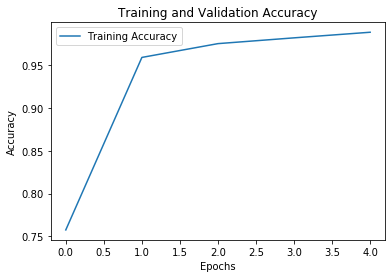

In [47]:
import matplotlib.pyplot as plt
# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
import matplotlib.image as mpimg

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [34]:
def predict_label(image_path):
    img = image.load_img(image_path, target_size=(img_size, img_size), color_mode='grayscale')  # Load as grayscale
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape of the model
    img_array = img_array / 255.  # Normalize the image data

    # Get the model's prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    return predicted_label[0] 

In [41]:
uploaded_image_path = 'image1.jpeg'  # Replace with the path to your uploaded image


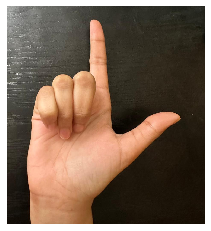

In [48]:
img = mpimg.imread(uploaded_image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis values
plt.show()

In [42]:
predicted_label = predict_label(uploaded_image_path)
print("Predicted Label Index:", predicted_label)

1/1 [==============================] - 0s 116ms/step
Predicted Label Index: 11


In [43]:
predicted_alphabet = labels[predicted_label]

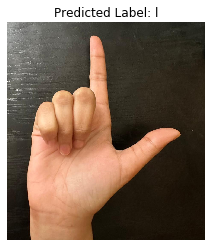

In [51]:
img = mpimg.imread(uploaded_image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis values
plt.title(f'Predicted Label: {labels[predicted_label]}')  # Set title with the predicted label
plt.show()

In [44]:
predicted_alphabet

'l'

In [62]:
import json

with open('cnn_model_history.json', 'w') as f:
    json.dump(history.history, f)